In [15]:
import numpy as np
from scipy import stats
import pandas as pd
import os
from collections import OrderedDict
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
def find_folder_upstream(folder_name, max_iterations=50):
    current_folder = os.getcwd()
    counter = 0
    while os.path.basename(current_folder) != folder_name and counter < max_iterations:
        current_folder = os.path.dirname(current_folder)
        counter += 1
    if not counter < max_iterations:
        return None
    return current_folder

root_folder_name = 'HIS3InterspeciesEpistasis'
root_folder = find_folder_upstream(root_folder_name)
if not root_folder:
    print 'Did not find root folder for our github repository.\nPlease run "ks01" notebook from a script inside the HIS3InterspeciesEpistasis folder!'

data_folder = os.path.join(root_folder, 'Data')
small_tables_folder = os.path.join(root_folder, 'Data_Small_Tables')
analysis_folder = os.path.join(root_folder, 'Analysis')
karen_folder = os.path.join(analysis_folder, 'Karen')

In [8]:
data_all = OrderedDict()
files = [f for f in os.listdir(data_folder) if '.csv' in f]
for f in sorted(files, key = lambda s: int(s.split('_')[0][1:])):
    data_all[f[:-9]] = pd.read_table(os.path.join(data_folder, f))

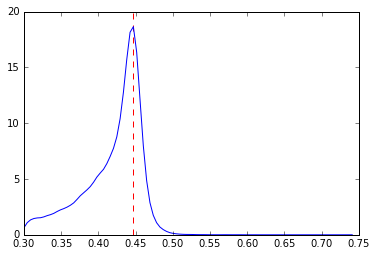

In [21]:
data = data_all['S1_scaled'][data_all['S1_scaled'].s > 0.3].s.values
kde = stats.gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 100)
p = kde(x)
center_of_peak = x[np.argmax(p)]
plt.axvline(center_of_peak, color='red', ls='--')
plt.plot(x,p)